<a href="https://colab.research.google.com/github/karthikdoguparthi/Amazon-Prime-EDA/blob/main/Amazon_Prime_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Amazon Prime EDA



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1 -** Karthik Doguparthi


# **Project Summary -**

The goal of this project is to perform a comprehensive **Exploratory Data Analysis on Amazon Prime** using two datasets that includes detailed information about movies and shows available on the platform. The analysis aims to uncover insights about content trends, audience preferences, platform strategy, and factors influencing content performance.

The dataset combines **Two CSV files** and contains columns such as person_id, id, name, character, role, title, type, description, release_year, age_certification, runtime, genres, production_countries, seasons, imdb_id, imdb_score, imdb_votes, tmdb_popularity, and tmdb_score. After merging both datasets on the common id column, the combined dataframe was cleaned and transformed to make it suitable for analysis. This included handling missing values, parsing nested fields like genres and production countries, and filtering or converting data types where necessary.

The analysis starts with identifying the distribution of content types as Movie vs Show, frequency of genres, most common age certifications, and runtime distributions. Visualizations such as bar charts, pie charts, histograms, and word clouds help in summarizing the dataset composition. It was found that movies dominate the platform, and genres like **Drama, Comedy, and Thriller** are most watched. The most common age certifications are TV-13 and PG, suggesting a focus on mature audiences.

**Line chart** shows how the volume of content released has changed over time, with a noticeable increase in recent years. **Box plots** compare IMDb scores across genres and types, while **scatter plots** show how runtime relates to IMDb ratings. It was observed that shows tend to receive slightly higher average IMDb scores than movies within the same genre. Most content has a runtime clustered between **50 to 150 minutes**, with longer durations generally associated with higher ratings.

A **Heatmap** was created to analyze IMDb score trends by genre across decades, showing how genres like Drama, Comedy and Thriller have gained higher audience ratings in recent decades. **Correlation heatmaps** and **pair plots** between numerical fields such as runtime, release_year and type helps in identifying weak or strong linear relationships, as well as outliers or clusters.

Key takeaways include identifying which genres are most highly rated, how audience preferences have shifted over time, and where Amazon Prime content is most viewed. These insights could help guide platform decisions such as which genres to invest in, what types of shows get better user engagement, and which markets might need more localized content.

# **GitHub Link -**

https://github.com/karthikdoguparthi/Amazon-Prime-EDA

# **Problem Statement**


**Uncovering key trends that influence subscription growth analysing Amazon Prime dataset**

#### **Define Your Business Objective?**

Performing data analysis on Amazon Prime Dataset to findout few interesting facts about the shows and movies, content diversity, trends over time, regional diversity, IMBD ratings and rankings.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from wordcloud import WordCloud


### Dataset Loading

In [ ]:
# Load Dataset
df1 = pd.read_csv('/content/credits.csv')
df2 = pd.read_csv('/content/titles.csv')

#merging two datsets
merged_df = pd.merge(df1, df2, on='id', how='inner')

### Dataset First View

In [ ]:
# Dataset First Look
merged_df.head()

,person_id,id,name,character,role,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,59401,ts20945,Joe Besser,Joe,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,31460,ts20945,Moe Howard,Moe,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
2,31461,ts20945,Larry Fine,Larry,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
rows, cols = merged_df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {cols}")

Number of rows: 124347
Number of columns: 19


### Dataset Information

In [ ]:
# Dataset Info
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124347 entries, 0 to 124346
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   person_id             124347 non-null  int64  
 1   id                    124347 non-null  object 
 2   name                  124347 non-null  object 
 3   character             108040 non-null  object 
 4   role                  124347 non-null  object 
 5   title                 124347 non-null  object 
 6   type                  124347 non-null  object 
 7   description           124256 non-null  object 
 8   release_year          124347 non-null  int64  
 9   age_certification     56707 non-null   object 
 10  runtime               124347 non-null  int64  
 11  genres                124347 non-null  object 
 12  production_countries  124347 non-null  object 
 13  seasons               8153 non-null    float64
 14  imdb_id               119044 non-null  object 
 15  

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

merged_df.duplicated().sum()

np.int64(168)

In [ ]:
merged_df[merged_df.duplicated()]

,person_id,id,name,character,role,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
9133,130904,tm89134,Buck Jones,Buck Roberts,ACTOR,The Gunman From Bodie,MOVIE,The Rough Riders are after a gang of rustlers....,1941,NaN,62,['western'],['US'],NaN,tt0033683,5.9,133.0,0.991,7.0
9135,36589,tm89134,Tim McCoy,Marshal McCall,ACTOR,The Gunman From Bodie,MOVIE,The Rough Riders are after a gang of rustlers....,1941,NaN,62,['western'],['US'],NaN,tt0033683,5.9,133.0,0.991,7.0
9137,130905,tm89134,Raymond Hatton,Sandy,ACTOR,The Gunman From Bodie,MOVIE,The Rough Riders are after a gang of rustlers....,1941,NaN,62,['western'],['US'],NaN,tt0033683,5.9,133.0,0.991,7.0
9139,132916,tm89134,Christine McIntyre,Alice Borden,ACTOR,The Gunman From Bodie,MOVIE,The Rough Riders are after a gang of rustlers....,1941,NaN,62,['western'],['US'],NaN,tt0033683,5.9,133.0,0.991,7.0
9141,132381,tm89134,Dave O'Brien,Joe Martin,ACTOR,The Gunman From Bodie,MOVIE,The Rough Riders are after a gang of rustlers....,1941,NaN,62,['western'],['US'],NaN,tt0033683,5.9,133.0,0.991,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13145,576620,tm137955,Finis Barton,Gladys,ACTOR,Broken Dreams,MOVIE,Medical intern Robert Morley is distraught aft...,1933,NaN,68,"['drama', 'romance']",['US'],NaN,tt0023849,5.8,74.0,0.600,NaN
13146,137455,tm137955,Sam Flint,Dr. Greenwood,ACTOR,Broken Dreams,MOVIE,Medical intern Robert Morley is distraught aft...,1933,NaN,68,"['drama', 'romance']",['US'],NaN,tt0023849,5.8,74.0,0.600,NaN
13147,137455,tm137955,Sam Flint,Dr. Greenwood,ACTOR,Broken Dreams,MOVIE,Medical intern Robert Morley is distraught aft...,1933,NaN,68,"['drama', 'romance']",['US'],NaN,tt0023849,5.8,74.0,0.600,NaN
13148,154486,tm137955,Robert G. Vignola,NaN,DIRECTOR,Broken Dreams,MOVIE,Medical intern Robert Morley is distraught aft...,1933,NaN,68,"['drama', 'romance']",['US'],NaN,tt0023849,5.8,74.0,0.600,NaN


In [ ]:
merged_df.drop_duplicates(inplace=True)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count wrt dataset

merged_df.isnull().sum()

,0
person_id,0
id,0
name,0
character,16277
role,0
title,0
type,0
description,91
release_year,0
age_certification,67472


In [ ]:
# Missing Values/Null Values Total Count

merged_df.isnull().sum().sum()

np.int64(227479)

In [ ]:
# Visualizing the missing values

merged_df[merged_df.isnull().any(axis=1)]

,person_id,id,name,character,role,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
5,28714,tm19248,Glen Cavender,Captain Anderson,ACTOR,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
6,28715,tm19248,Jim Farley,General Thatcher,ACTOR,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
7,27348,tm19248,Frederick Vroom,A Southern General,ACTOR,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124342,1938589,tm1054116,Sangam Shukla,Madhav,ACTOR,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.4,49.0,0.645,NaN
124343,1938565,tm1054116,Vijay Thakur,Sanjay Thakur,ACTOR,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.4,49.0,0.645,NaN
124344,728899,tm1054116,Vanya Wellens,Budhiya,ACTOR,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.4,49.0,0.645,NaN
124345,1938620,tm1054116,Vishwa Bhanu,Gissu,ACTOR,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.4,49.0,0.645,NaN


### What did you know about your dataset?

After loading and merging my dataset, I noticed this was a large datset with 124347 rows and 19 columns within. When I saw the datset information I could find that count of all the columns are not same. Which imples there are NULL/NaN values in the dataset. Well what else can we hope from a real time dataset.

I also noticed duplicate values in the dataset ( 168 duplicates values in the whole datset) mostly which were referring to the same 'id' and the only change was the actor from the show. NaN values are from Age Certification, Seasons of the show and IMDB ratings.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns

merged_df.columns

Index(['person_id', 'id', 'name', 'character', 'role', 'title', 'type',
       'description', 'release_year', 'age_certification', 'runtime', 'genres',
       'production_countries', 'seasons', 'imdb_id', 'imdb_score',
       'imdb_votes', 'tmdb_popularity', 'tmdb_score'],
      dtype='object')

In [ ]:
# Dataset Describe

merged_df.describe(include='all')

,person_id,id,name,character,role,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,1.241790e+05,124179,124179,107902,124179,124179,124179,124088,124179.000000,56707,124179.000000,124179,124179,8153.000000,118876,118128.000000,1.181040e+05,124164.000000,114010.000000
unique,NaN,8861,79758,71097,2,8748,2,8833,NaN,11,NaN,1965,482,NaN,8267,NaN,NaN,NaN,NaN
top,NaN,tm458582,George 'Gabby' Hayes,Himself,ACTOR,Coming 2 America,MOVIE,Prince Akeem Joffer is set to become King of Z...,NaN,R,NaN,['drama'],['US'],NaN,tt6802400,NaN,NaN,NaN,NaN
freq,NaN,137,49,1540,115793,137,116026,137,NaN,25931,NaN,9853,69217,NaN,137,NaN,NaN,NaN,NaN
mean,4.065843e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996.307186,NaN,95.577706,NaN,NaN,2.337790,NaN,5.968327,2.327575e+04,10.177932,5.991464
std,5.617204e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.752141,NaN,30.166205,NaN,NaN,3.130184,NaN,1.242262,8.846004e+04,40.765311,1.321207
min,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1912.000000,NaN,1.000000,NaN,NaN,1.000000,NaN,1.100000,5.000000e+00,0.000011,0.800000
25%,3.898850e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1983.000000,NaN,83.000000,NaN,NaN,1.000000,NaN,5.200000,2.890000e+02,1.886000,5.300000
50%,1.339490e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009.000000,NaN,93.000000,NaN,NaN,1.000000,NaN,6.100000,1.257000e+03,3.896000,6.100000
75%,5.712810e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,109.000000,NaN,NaN,2.000000,NaN,6.800000,7.074000e+03,8.795000,6.800000


### Variables Description

The dataset consists of list of shows avalilable in Amazon Prime, with each row identifying by 'id'. It contains variables like name, character, title of the show, release year, imdb rating on the scale of 10. Age certification shows the minimum age limit to watch the movie, if below 13 parental guidance(TV-PG) or below 18 or R rated etc. The genre column shows the set of all the genres included by the show. These are about few variables given in the dataset.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values Count for each variable.

merged_df.nunique()

,0
person_id,80508
id,8861
name,79758
character,71097
role,2
title,8748
type,2
description,8833
release_year,110
age_certification,11


In [ ]:
# Check Unique Values for each variable.

for column in merged_df.columns:
    unique_values = merged_df[column].unique()
    print(f"Unique values for column '{column}':")
    print(unique_values)
    print()

Unique values for column 'person_id':
[  59401   31460   31461 ... 1938565  728899 1938620]

Unique values for column 'id':
['ts20945' 'tm19248' 'tm82253' ... 'tm1079144' 'tm847725' 'tm1054116']

Unique values for column 'name':
['Joe Besser' 'Moe Howard' 'Larry Fine' ... 'Vijay Thakur' 'Vanya Wellens'
 'Vishwa Bhanu']

Unique values for column 'character':
['Joe' 'Moe' 'Larry' ... 'Sanjay Thakur' 'Budhiya' 'Gissu']

Unique values for column 'role':
['ACTOR' 'DIRECTOR']

Unique values for column 'title':
['The Three Stooges' 'The General' 'The Best Years of Our Lives' ...
 'Jay Nog: Something from Nothing' 'Chasing' 'Baikunth']

Unique values for column 'type':
['SHOW' 'MOVIE']

Unique values for column 'description':
["The Three Stooges were an American vaudeville and comedy team active from 1922 until 1970, best known for their 190 short subject films by Columbia Pictures that have been regularly airing on television since 1958. Their hallmark was physical farce and slapstick. In fil

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

# Delete Description column
merged_df.drop('description', axis=1, inplace=True)

# Delete IMDB_ID column
merged_df.drop('imdb_id', axis=1, inplace=True)

# Delete Character column
merged_df.drop('character', axis=1, inplace=True)

# Fill NaN with 0
merged_df['seasons'] = merged_df['seasons'].fillna(0)

#Replace all remaining NaN with 0
merged_df = merged_df.fillna(0)

# Fill NaNs with 'TV-PG'
merged_df['age_certification'] = merged_df['age_certification'].fillna('TV-PG')

# Convert values > 21 to 21, then restore 'TV-PG'
merged_df['age_certification'] = (
    pd.to_numeric(merged_df['age_certification'], errors='coerce')
    .clip(upper=21)
    .fillna('TV-PG')
)

In [ ]:
# Splitting country lists to single values and replacing empty ones with 0
def extract_countries(val):
    try:
        parsed = ast.literal_eval(val) if isinstance(val, str) else val
        if isinstance(parsed, (dict, list)) and not parsed:
            return 0
        return [parsed] if isinstance(parsed, str) else parsed
    except:
        return 0

exploded = (
    merged_df.assign(parsed_countries=merged_df['production_countries'].apply(extract_countries))
             .query("parsed_countries != 0")
             .explode('parsed_countries')
)

top_countries = exploded['parsed_countries'].value_counts().head(10)

In [ ]:
# Verifying we have all Non Null values
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124179 entries, 0 to 124346
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   person_id             124179 non-null  int64  
 1   id                    124179 non-null  object 
 2   name                  124179 non-null  object 
 3   role                  124179 non-null  object 
 4   title                 124179 non-null  object 
 5   type                  124179 non-null  object 
 6   release_year          124179 non-null  int64  
 7   age_certification     124179 non-null  object 
 8   runtime               124179 non-null  int64  
 9   genres                124179 non-null  object 
 10  production_countries  124179 non-null  object 
 11  seasons               124179 non-null  float64
 12  imdb_score            124179 non-null  float64
 13  imdb_votes            124179 non-null  float64
 14  tmdb_popularity       124179 non-null  float64
 15  tmdb_

### What all manipulations have you done and insights you found?

I have gone through all the columns in the dataset and removed the columns with which we cannot have any insights i.e Description, IMDB_ID, Character. Filled NaN in Seasons with 0 because as the type suggested Show/Movie, Movie will have only 1 season and few other shows might also have only 1 season. It is better to replace that with 0. With this only few NaN will be left in imdb_scores, imdb_votes, tmdb_popularity, tmdb_score. I replaced all those NaN with 0 to get better results when any data visualisation is performed on the colomn. The produced countries column have each row as a list, I have seperated each row and repleced empty lists and empty strings with 0.

I have noticed ***Language of the show was a missing column*** that might be insightful for data visualization to know which might be the top 10 languages Amazon Prime must focus on their investment for shows.




## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

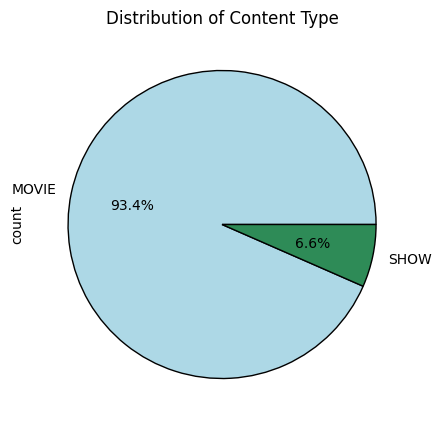

In [ ]:
# Chart - 1 visualization code
# What type of show it is
plt.figure(figsize=(5,5))
merged_df['type'].value_counts().plot(kind='pie',autopct='%1.1f%%',
    colors=['lightblue', 'seagreen'], wedgeprops={'edgecolor': 'black'})

plt.title('Distribution of Content Type')
plt.show()

##### 1. Why did you pick the specific chart?

Pie chart gives a detailed information of how much percentage of what type of content that it is.

##### 2. What is/are the insight(s) found from the chart?

Most of the content on Amazon Prime is related to movies compared to show/series.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Definitely it will lead to positive impact because it clearly shows us what type of show is on the platform to watch.

#### Chart - 2

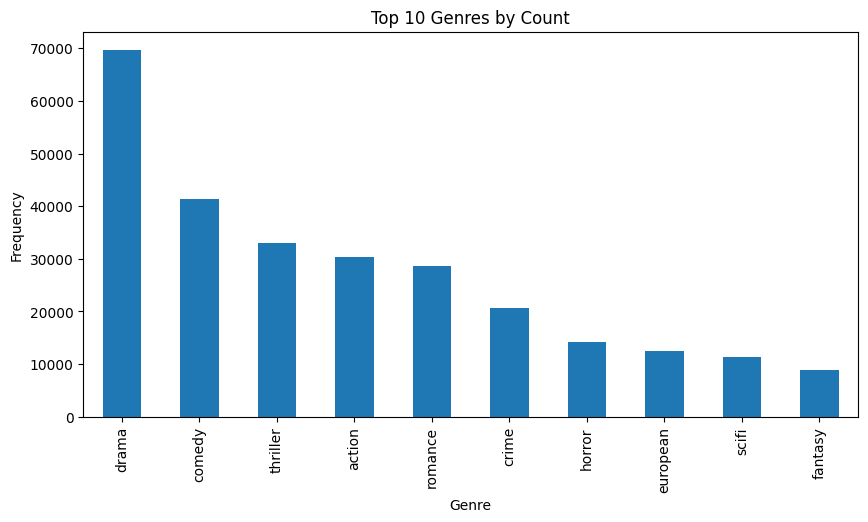

In [ ]:
# Chart - 2 visualization code
# Top 10 most available shows wrt genre

# Convert genre strings to lists
merged_df['genres'] = merged_df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Set genre dictionary so each row has only one genre
exploded_df = merged_df.explode('genres')

# Plot graph
exploded_df['genres'].value_counts().head(10).plot(kind='bar', title='Top 10 Genres by Count', xlabel='Genre', ylabel='Frequency', figsize=(10,5))
plt.show()

##### 1. Why did you pick the specific chart?

Bar chart gives detailed information of different categories of data representing the values.

##### 2. What is/are the insight(s) found from the chart?

Top 10 most available shows wrt genre

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It will definitely create a positive impact as the chart shows which type of content is prefered by the audience.

#### Chart - 3

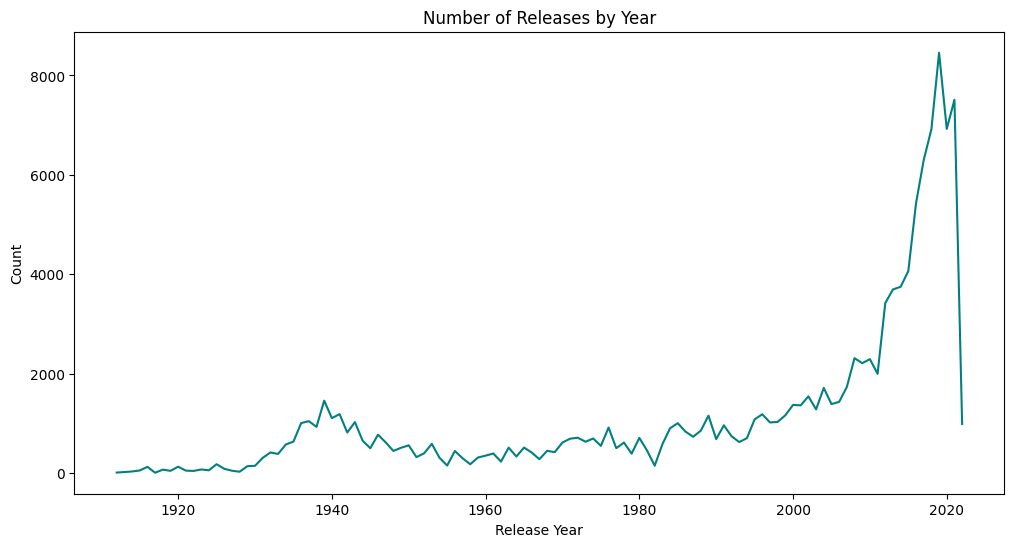

In [ ]:
# Chart - 3 visualization code

# Release year trend how content releases have changed over time

plt.figure(figsize=(12,6))
merged_df['release_year'].value_counts().sort_index().plot(kind='line',color='teal')

plt.title('Number of Releases by Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

Line chart gives the trend from beginning to the end upon setting the ranges.

##### 2. What is/are the insight(s) found from the chart?

How release year trend how content releases have changed over time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This chart gived an idea how many shows are being released in an year and how many to invest in an year.

#### Chart - 4

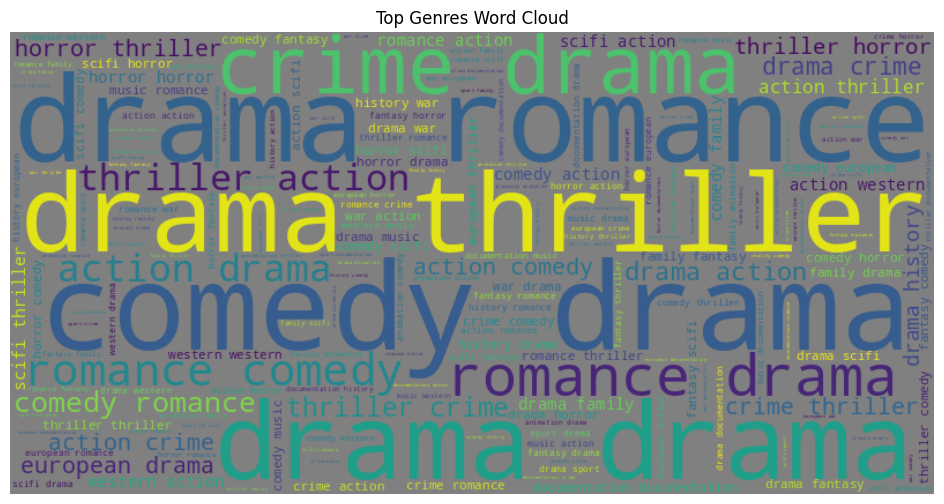

In [ ]:
# Chart - 4 visualization code

# Drop NaNs and ensure everything is a list
genre_series = merged_df['genres'].dropna().apply(lambda x: x if isinstance(x, list) else str(x).strip("[]").replace("'", "").split(','))
all_genres = [genre.strip() for sublist in genre_series for genre in sublist if isinstance(genre, str)]
genre_text = ' '.join(all_genres)

wordcloud = WordCloud(width=800, height=400, background_color='grey').generate(genre_text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top Genres Word Cloud')
plt.show()

##### 1. Why did you pick the specific chart?

Word cloud gives information on what data is the dataset most concentrated on.

##### 2. What is/are the insight(s) found from the chart?

This gives information of what type of mixed content are people preferring to watch.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Definitely based on this we can know what type of mixed content audience are prefering and what content should the company invest on.

#### Chart - 5

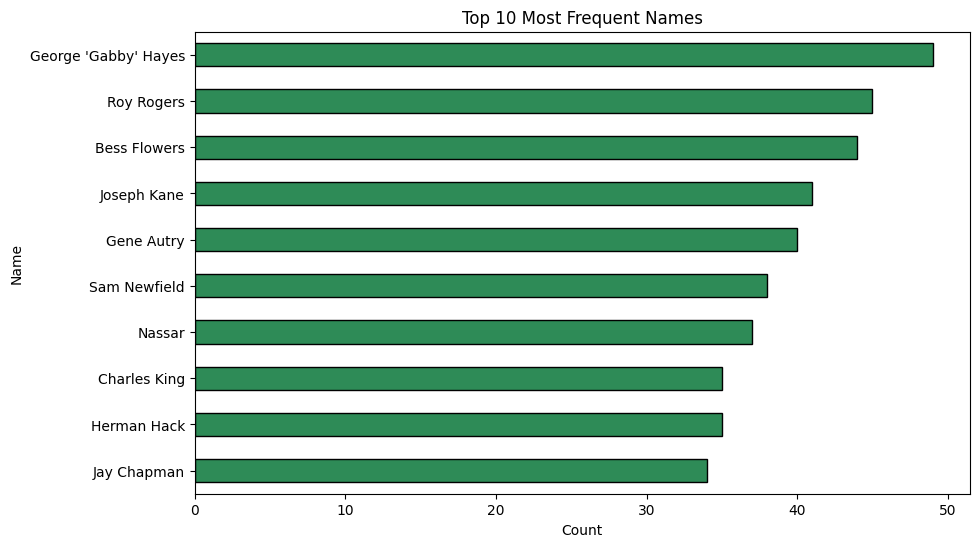

In [ ]:
# Chart - 5 visualization code

# Top actors/roles Most frequent actors or contributors
plt.figure(figsize=(10,6))
merged_df['name'].value_counts().head(10).sort_values().plot(kind='barh',color='seagreen',edgecolor='black')

plt.title('Top 10 Most Frequent Names')
plt.xlabel('Count')
plt.ylabel('Name')
plt.show()

##### 1. Why did you pick the specific chart?

Bar chart gives detailed information of different categories of data representing the values.

##### 2. What is/are the insight(s) found from the chart?

Top 10 actors/directors and how many roles did they contribute.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This gives the team an insight for the team to create business promotions for the show or maybe the content based on the actor.

#### Chart - 6

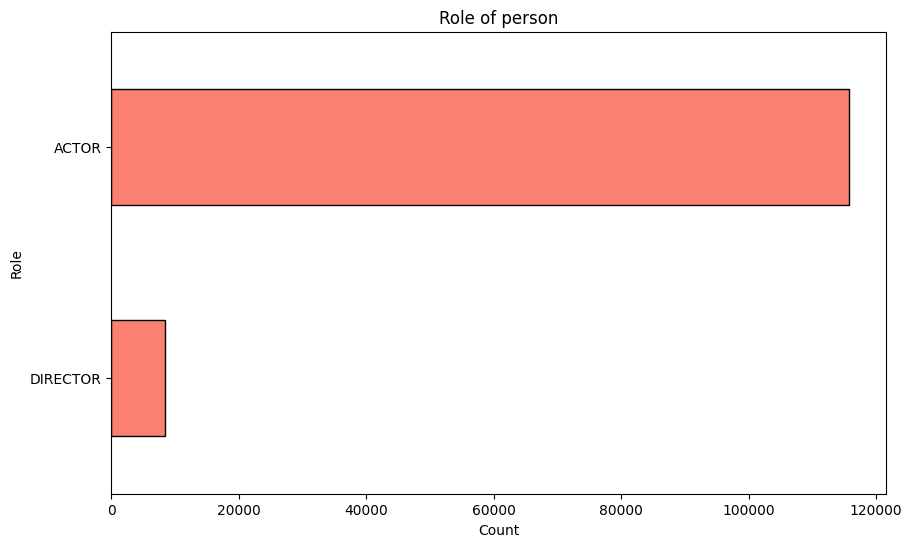

In [ ]:
# Chart - 6 visualization code

#Role distribution Director / Actor
plt.figure(figsize=(10,6))
merged_df['role'].value_counts().head(10).sort_values().plot(kind='barh',color='salmon',edgecolor='black')

plt.title('Role of person')
plt.xlabel('Count')
plt.ylabel('Role')
plt.show()

##### 1. Why did you pick the specific chart?

Bar chart gives detailed information of different categories of data representing the values.

##### 2. What is/are the insight(s) found from the chart?

Gives the information whether the person is an actor or a director.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The comapany can promote the show based on the actor or director.

#### Chart - 7

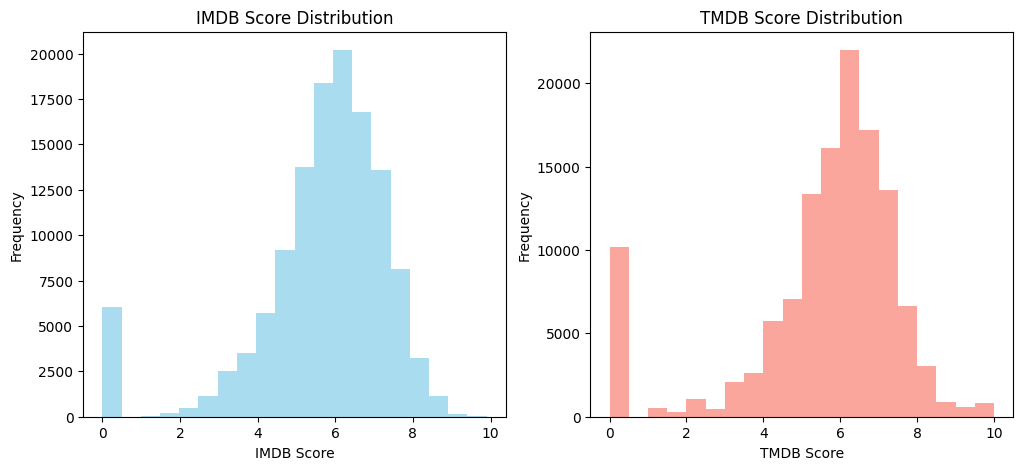

In [ ]:
# Chart - 7 visualization code
# IMDB and TMDB score distribution

# Create figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot imdb_score histogram
axes[0].hist(merged_df['imdb_score'].dropna(), bins=20, alpha=0.7, color='skyblue')
axes[0].set_title('IMDB Score Distribution')
axes[0].set_xlabel('IMDB Score')
axes[0].set_ylabel('Frequency')

# Plot tmdb_score histogram
axes[1].hist(merged_df['tmdb_score'].dropna(), bins=20, alpha=0.7, color='salmon')
axes[1].set_title('TMDB Score Distribution')
axes[1].set_xlabel('TMDB Score')
axes[1].set_ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

I used histogram to find out the distribution frequency of single numerical value within the spread and to find any unusual patterns.

##### 2. What is/are the insight(s) found from the chart?

Gives an idea what is the average score given by IMDB and TMDB for the show. Both shows almost 6.5 as the most scored for the shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

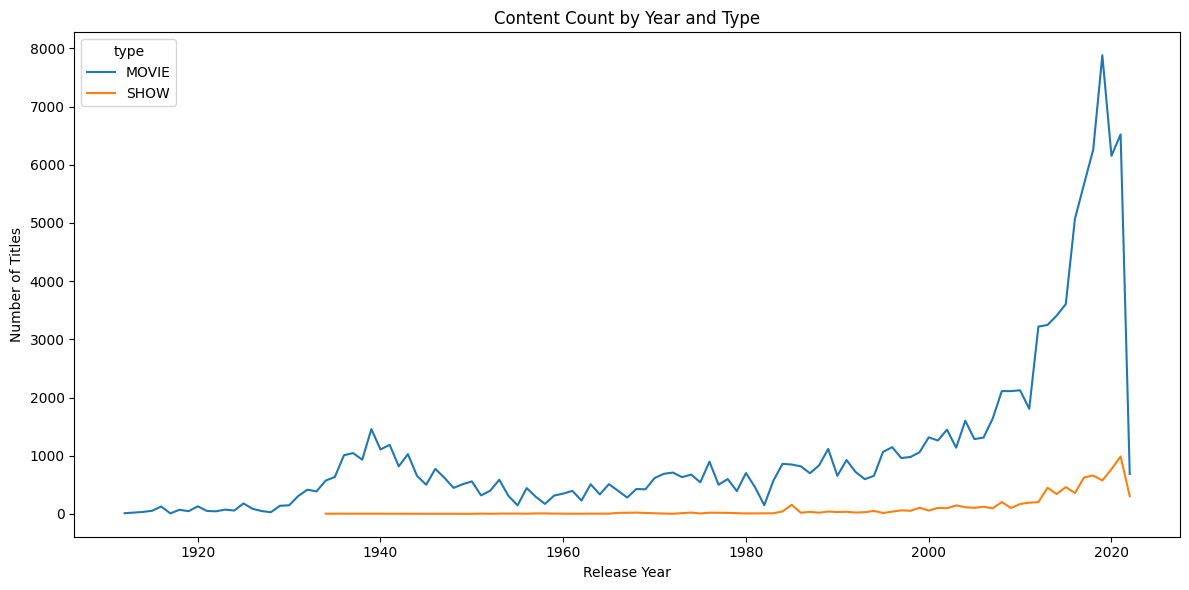

In [ ]:
# Chart - 8 visualization code
# Content by Release Year and Type
year_counts = (
    merged_df[merged_df['release_year'].notnull()]
    .groupby(['release_year', 'type'])['title'].count().reset_index()
    .rename(columns={'title': 'count'}))

plt.figure(figsize=(12, 6))
sns.lineplot(data=year_counts, x='release_year', y='count', hue='type')
plt.title('Content Count by Year and Type')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I used line chart to show te trend on how the show release are fluctuated over time.

##### 2. What is/are the insight(s) found from the chart?

Comparing type of content relased year by year.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Company can know which type of show to invest on and also might help them to strategically plan on their subscription plans.

#### Chart - 9

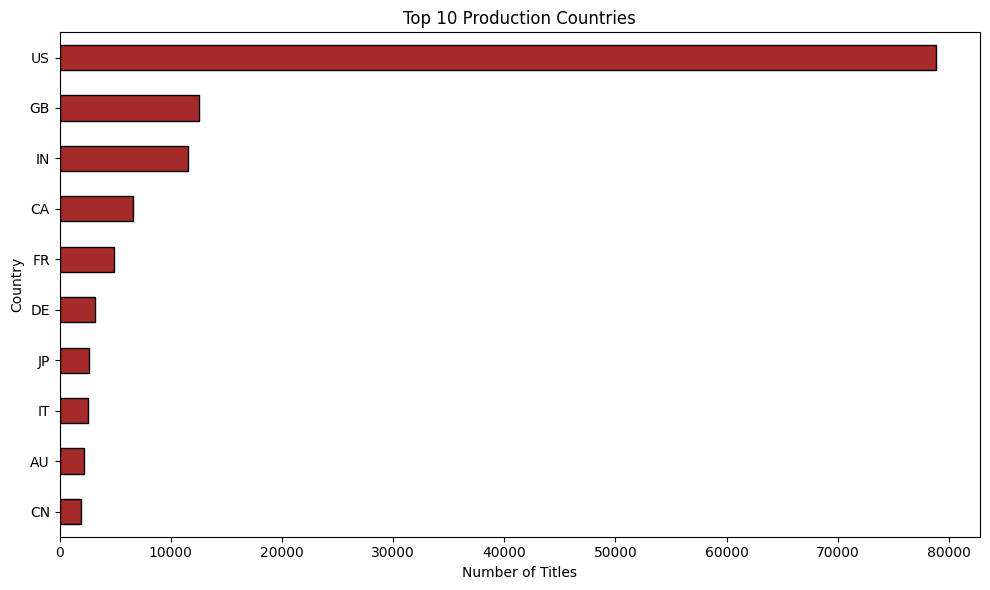

In [ ]:
# Chart - 9 visualization code

plt.figure(figsize=(10, 6))
top_countries.sort_values().plot(kind='barh',color='brown',edgecolor='black')
plt.title('Top 10 Production Countries')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Bar chart gives detailed information of different categories of data representing the values.

##### 2. What is/are the insight(s) found from the chart?

When comes to movies or show production like we know Hollywood industry is very vast, it clearly shows how many shoes were produced overall by the industry.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We don't have any negative impact on the trend because this chart shows how much Hollywood industry id dedicated to produce more concent and company can take this as a note as to invest more on this industry.

#### Chart - 10

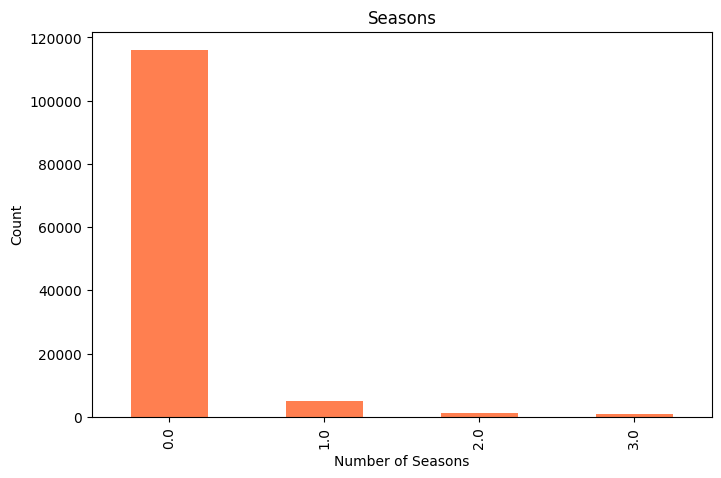

In [ ]:
# Chart - 10 visualization code

# Get season number
merged_df['seasons'] = pd.to_numeric(merged_df['seasons'], errors='coerce')
seasons_counts = merged_df['seasons'].value_counts().sort_index()

# Filter to only seasons from 0 to 3
seasons_counts = seasons_counts[(seasons_counts.index >= 0) & (seasons_counts.index <= 3)]
ax = seasons_counts.plot(kind='bar', color='coral', figsize=(8, 5))

# Set labels and title
plt.xlabel('Number of Seasons')
plt.ylabel('Count')
plt.title('Seasons')
plt.show()

##### 1. Why did you pick the specific chart?

Bar chart gives detailed information of different categories of data representing the values.

##### 2. What is/are the insight(s) found from the chart?

Most of the show has 0 seasons doesn't really imply that they are done with the show. Most of them are including movies that doesn't have any sequel part or there might be very few movies which are having sequels that come into 2 season category. Given the dataset contains movies as a majority it is to be understood that 0 seasons will be the highest in category.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This will give an idea to the company on how many movies and shows are completed on almost no seaons.

#### Chart - 11

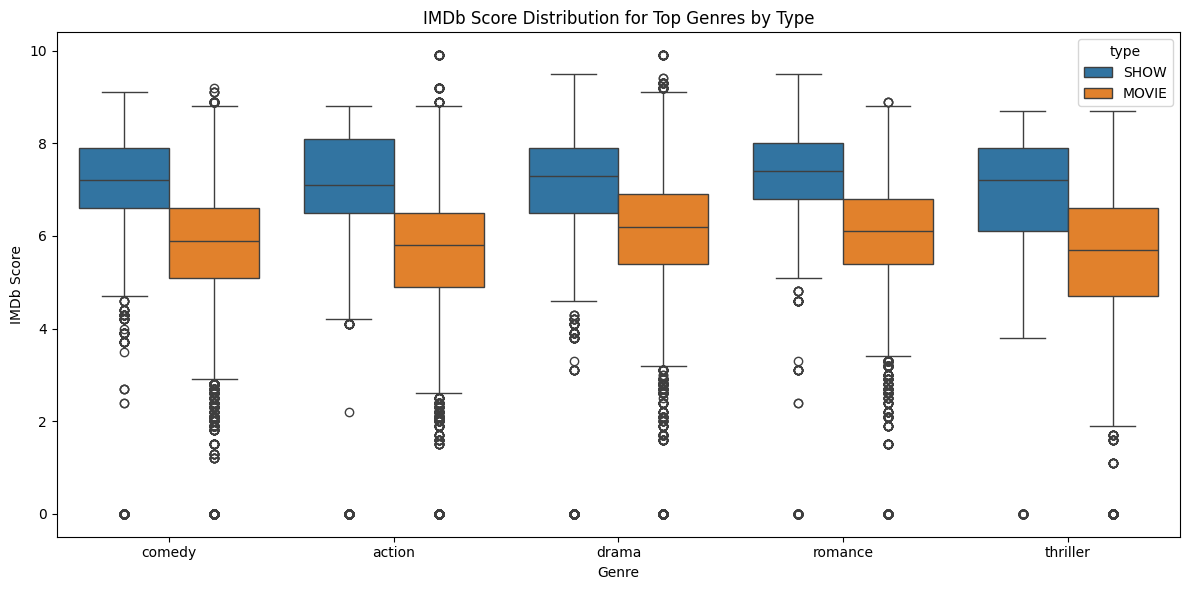

In [ ]:
# Chart - 11 visualization code
# IMDb Score Distribution by Type and Genre shows variability and outliers.
top_genres = exploded_df['genres'].value_counts().head(5).index
subset = exploded_df[exploded_df['genres'].isin(top_genres)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=subset, x='genres', y='imdb_score', hue='type')
plt.title('IMDb Score Distribution for Top Genres by Type')
plt.xlabel('Genre')
plt.ylabel('IMDb Score')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

With box chart, we can see how the data is distributed and if it has any outliers in the dataset and the center value for the distributed data.

##### 2. What is/are the insight(s) found from the chart?

Most of the shows have an average IMDB score of 7 and movie has an average value of 6 if we exclude the outliers ranging from q1 to q3.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It will give an idea if the show has IMDB score > 5.5 atleast for series or movie the comapany can invest on it.

#### Chart - 12

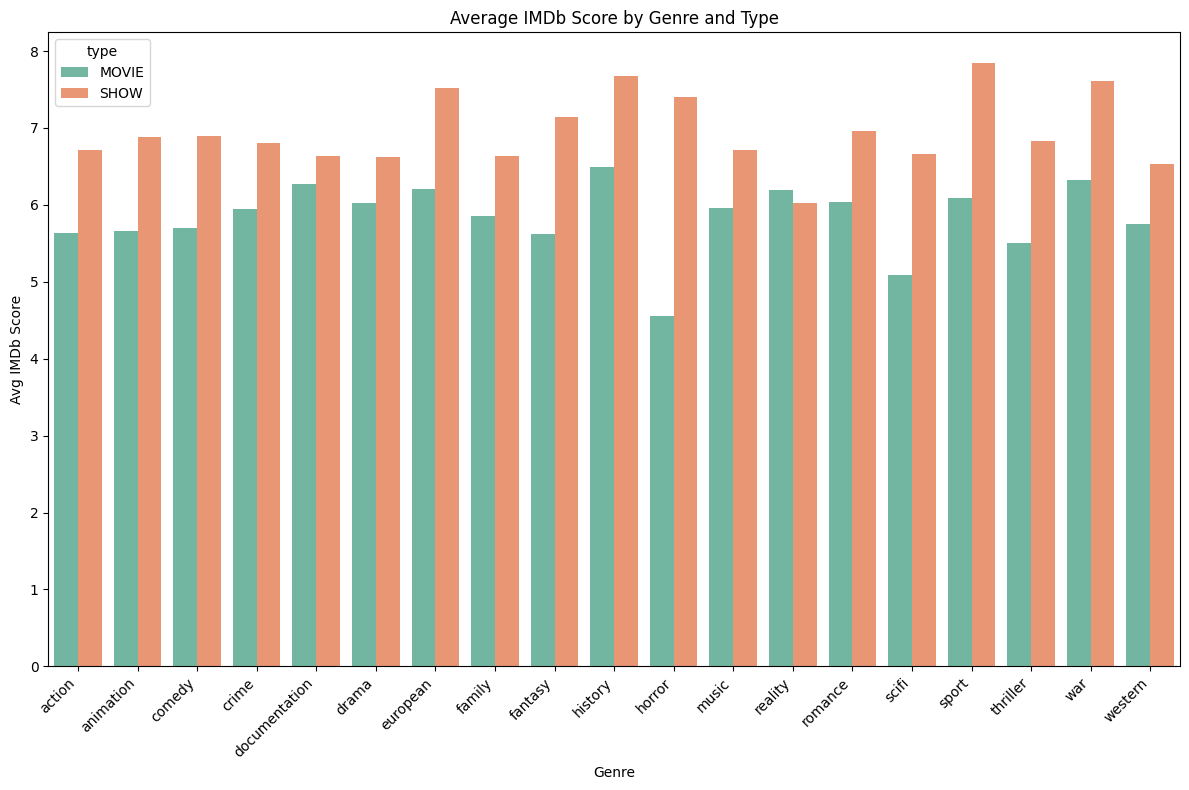

In [ ]:
# Chart - 12 visualization code
# Compare genre performance between type
genretype_df = (
    exploded_df[exploded_df['imdb_score'].notnull()]
    .groupby(['genres', 'type'])['imdb_score'].mean().reset_index())

plt.figure(figsize=(12, 8))
sns.barplot(data=genretype_df, x='genres', y='imdb_score', hue='type', palette='Set2')
plt.title('Average IMDb Score by Genre and Type')
plt.xlabel('Genre')
plt.ylabel('Avg IMDb Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I used this clustered bar chart to show the genre performance of shows side by side.

##### 2. What is/are the insight(s) found from the chart?

Almost all of the Avg IMDB ratings for the genre is more for show compared to movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It will not give any negative impact infact it will be very helpful to compare multiple sections and to see which one performs better.

#### Chart - 13

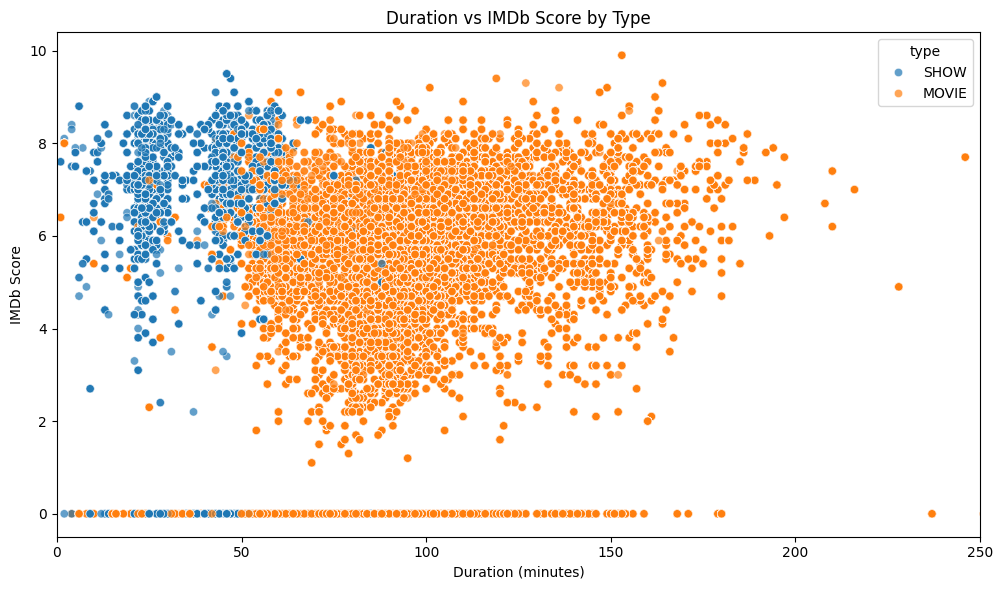

In [ ]:
# Chart - 13 visualization code

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='runtime', y='imdb_score', hue='type', alpha=0.7)
plt.title('Duration vs IMDb Score by Type')
plt.xlabel('Duration (minutes)')
plt.ylabel('IMDb Score')
plt.tight_layout()
plt.xlim(0, 250)
plt.show()

##### 1. Why did you pick the specific chart?

Scatter plot shows the clusters where most of the data is concentrated.

##### 2. What is/are the insight(s) found from the chart?

We can see that most of the shows are concentrated over 30 mins and 50 mins where as movie runtimes are concentrated from 50 to 150 mins.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It shows where the company to invest in show or movie based on the runtime of the show.

#### Chart - 14 - Correlation Heatmap

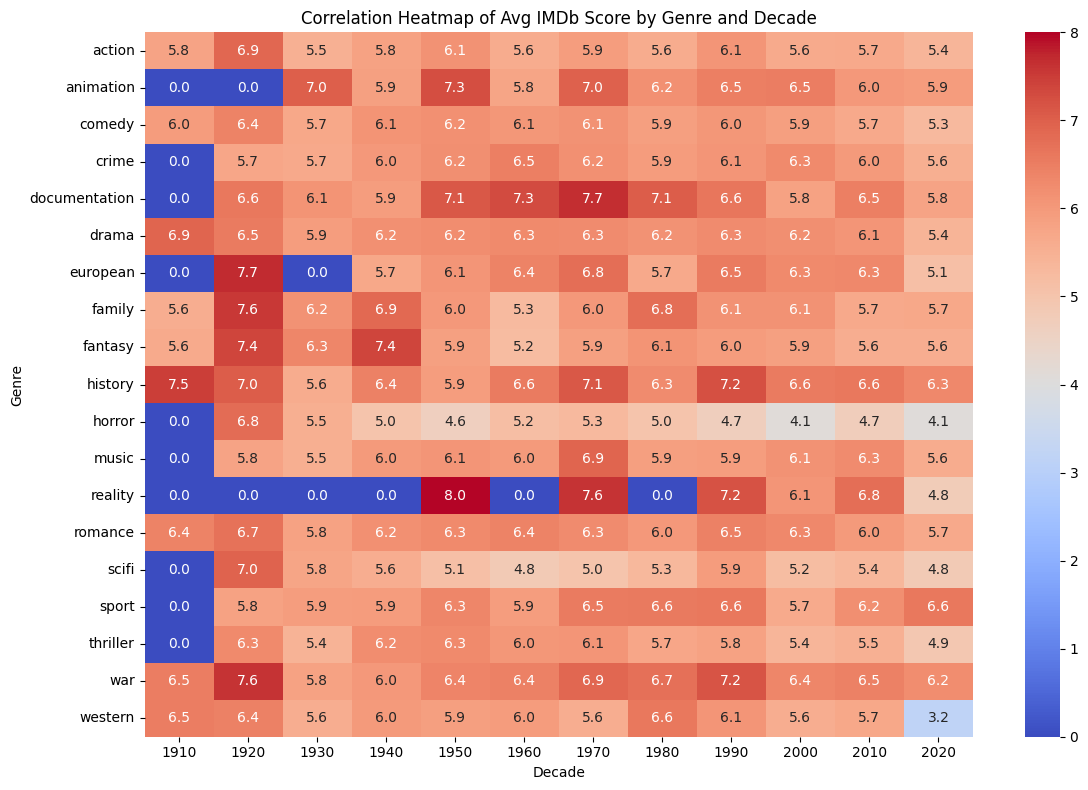

In [ ]:
# Correlation Heatmap visualization code

exploded_df['decade'] = (exploded_df['release_year'] // 10) * 10

heatmap_data = (
    exploded_df[exploded_df['imdb_score'].notnull()].groupby(['genres', 'decade'])['imdb_score'].mean()
    .unstack().fillna(0))

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Correlation Heatmap of Avg IMDb Score by Genre and Decade')
plt.xlabel('Decade')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Correlation heatmap gives information of high and low releases in year based on on the color.

##### 2. What is/are the insight(s) found from the chart?

If the color is towards red it has more releases in that decade, and if its towards blue the fewer releases it has in that decade.

#### Chart - 15 - Pair Plot

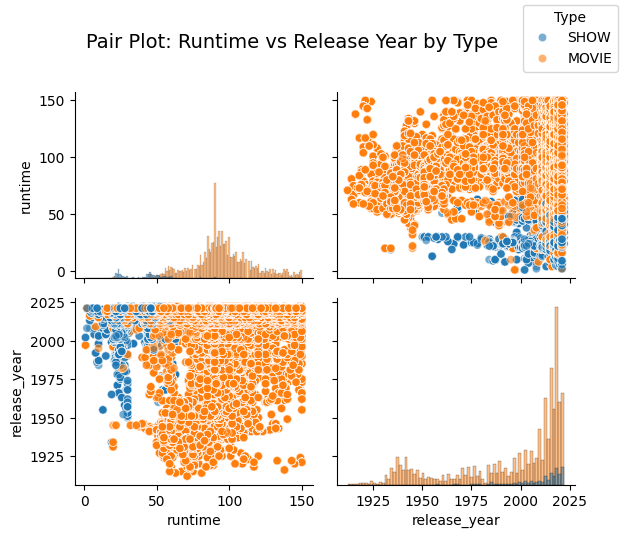

In [ ]:
# Pair Plot visualization code


# Filter to remove outliers and missing values
filtered_df = merged_df[
    (merged_df['runtime'] <= 150) &
    (merged_df['release_year'].notnull()) &
    (merged_df['type'].notnull())]

pair_data = filtered_df[['runtime', 'release_year', 'type']]

# Create the pair plot with hue
g = sns.pairplot(pair_data, hue='type', kind='scatter', diag_kind='hist', plot_kws={'alpha': 0.6})

# Move the legend to the top-right outside the plot
g._legend.set_bbox_to_anchor((1.05, 1))
g._legend.set_frame_on(True)
g._legend.set_title('Type')

# Add title
plt.suptitle('Pair Plot: Runtime vs Release Year by Type', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Pair plot helps us to find correlation, clusters and outliers between two entities.

##### 2. What is/are the insight(s) found from the chart?

Here the plot between release year and runtime shows how the data is correlated with each other and how the runtime of the show has been changed over time and how may releases we can see in intervals of 25 years.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
To help Amazon Prime achieve its business objective of increasing subscriptions and improving viewer engagement, my EDA analysis suggests a focused content strategy. Genres like Drama, Comedy and Thriller consistently receive higher viewer ratings, indicating a strong preference that should guide future investments. Most content is concentrated in few countries, presenting an opportunity to expand regional productions for wider audience. Runtime show that viewers prefer content between 50 to 150 minutes, suggesting an optimal viewing window. Top performing actors and directors appear repeatedly in top rated shows, so having collaborations with such people can drive content success. Audience ratings like IMDb and TMDb provide valuable feedback and these should be monitored to inform marketing strategies for selecting right content. Releasing new content during peak viewing seasons can boost engagement.

# **Conclusion**

This EDA project not only uncovers patterns in viewer engagement and content strategy but also demonstrates the power of storytelling using Python, Pandas, Seaborn, and Matplotlib. This notebook provides reusable, well commented code and multiple visualizations that make the data accessible to both technical and non technical companies to work further on this data.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***